<a href="https://colab.research.google.com/github/JonathanJuradoS/EspacioEstados/blob/main/Importacion_China_Peru_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Análisis de Rutas de Importación: China → Perú

Este notebook presenta un caso práctico de importación desde Shanghái hacia Lima, incluyendo visualizaciones de grafos, mapas de rutas, y una tabla comparativa de costos y tiempos.

## 🧭 Descripción del Caso

La empresa peruana **Tecnología Verde S.A.C.** necesita importar 10 toneladas de componentes electrónicos desde **Shanghái, China**, hacia **Lima, Perú**. Se consideran tres rutas:

- Ruta marítima tradicional vía **Canal de Panamá**
- Ruta marítima alternativa vía **Cabo de Hornos**
- Ruta aérea vía **Los Ángeles y Panamá**

In [1]:
import pandas as pd

# Tabla de costos y tiempos
data = {
    "Origen": ["Shanghái", "Shanghái", "Shanghái", "Los Ángeles", "Panamá", "Canal de Panamá", "Cabo de Hornos"],
    "Destino": ["Canal de Panamá", "Cabo de Hornos", "Los Ángeles", "Panamá", "Lima", "Lima", "Lima"],
    "Medio": ["Marítimo", "Marítimo", "Aéreo", "Aéreo", "Aéreo", "Marítimo", "Marítimo"],
    "Costo Estimado": ["USD $8,000", "USD $16,000", "Parte 1", "Parte 2", "USD $45,000", "Incluido", "Incluido"],
    "Tiempo Estimado": ["30 días", "90 días", "2 días", "2 días", "2 días", "15 días", "20 días"]
}
df = pd.DataFrame(data)
df

,Origen,Destino,Medio,Costo Estimado,Tiempo Estimado
0,Shanghái,Canal de Panamá,Marítimo,"USD $8,000",30 días
1,Shanghái,Cabo de Hornos,Marítimo,"USD $16,000",90 días
2,Shanghái,Los Ángeles,Aéreo,Parte 1,2 días
3,Los Ángeles,Panamá,Aéreo,Parte 2,2 días
4,Panamá,Lima,Aéreo,"USD $45,000",2 días
5,Canal de Panamá,Lima,Marítimo,Incluido,15 días
6,Cabo de Hornos,Lima,Marítimo,Incluido,20 días


## 🔗 Visualización de Rutas con Grafos

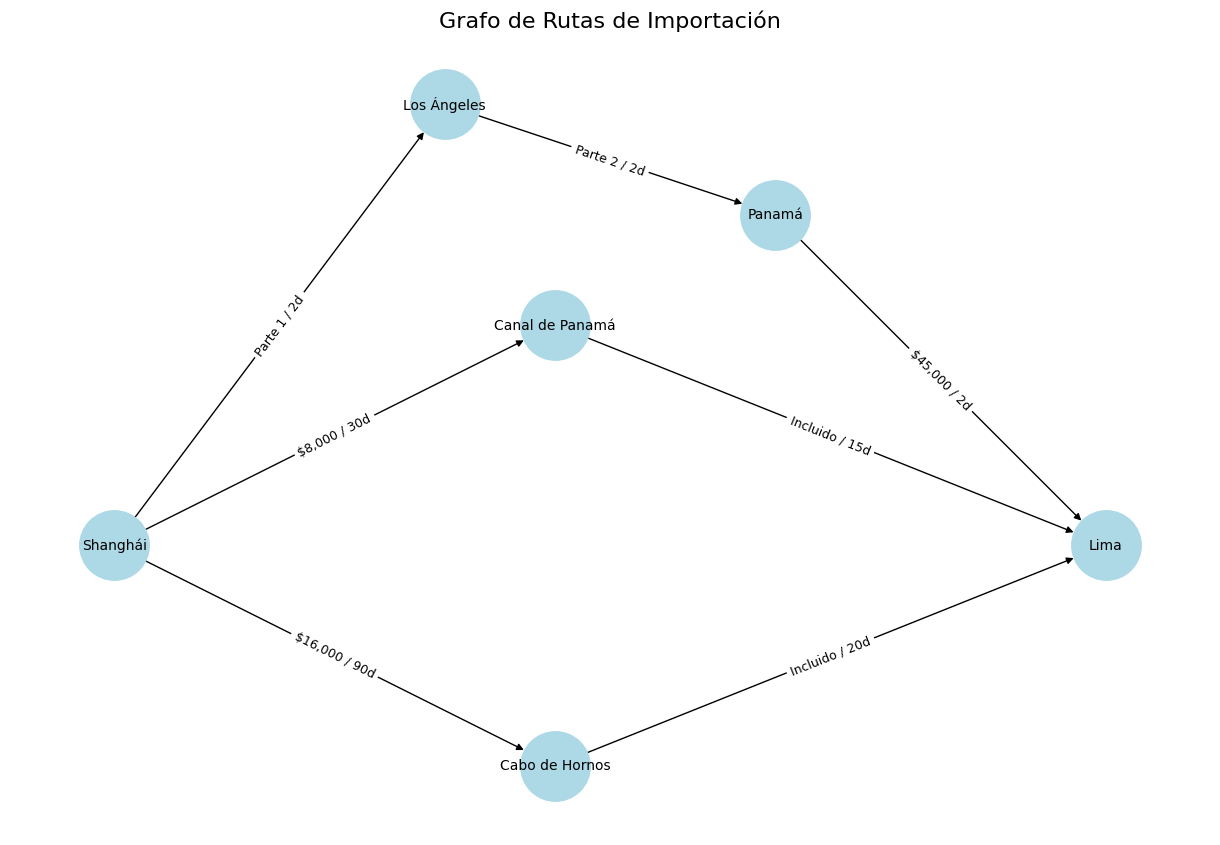

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear el grafo con pesos
G = nx.DiGraph()
aristas = [
    ("Shanghái", "Canal de Panamá", "$8,000 / 30d"),
    ("Shanghái", "Cabo de Hornos", "$16,000 / 90d"),
    ("Shanghái", "Los Ángeles", "Parte 1 / 2d"),
    ("Los Ángeles", "Panamá", "Parte 2 / 2d"),
    ("Panamá", "Lima", "$45,000 / 2d"),
    ("Canal de Panamá", "Lima", "Incluido / 15d"),
    ("Cabo de Hornos", "Lima", "Incluido / 20d")
]
for o, d, lbl in aristas:
    G.add_edge(o, d, label=lbl)

# Posiciones para visualización aproximada
pos = {
    "Shanghái": (0, 0),
    "Canal de Panamá": (2, 1),
    "Cabo de Hornos": (2, -1),
    "Los Ángeles": (1.5, 2),
    "Panamá": (3, 1.5),
    "Lima": (4.5, 0)
}

plt.figure(figsize=(12, 8))
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
plt.title("Grafo de Rutas de Importación", fontsize=16)
plt.axis('off')
plt.show()

## 🗺️ Mapa Mundial con Rutas de Importación

In [4]:
#!apt-get install -y libgeos-dev
!pip install basemap basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 98.6 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing instal

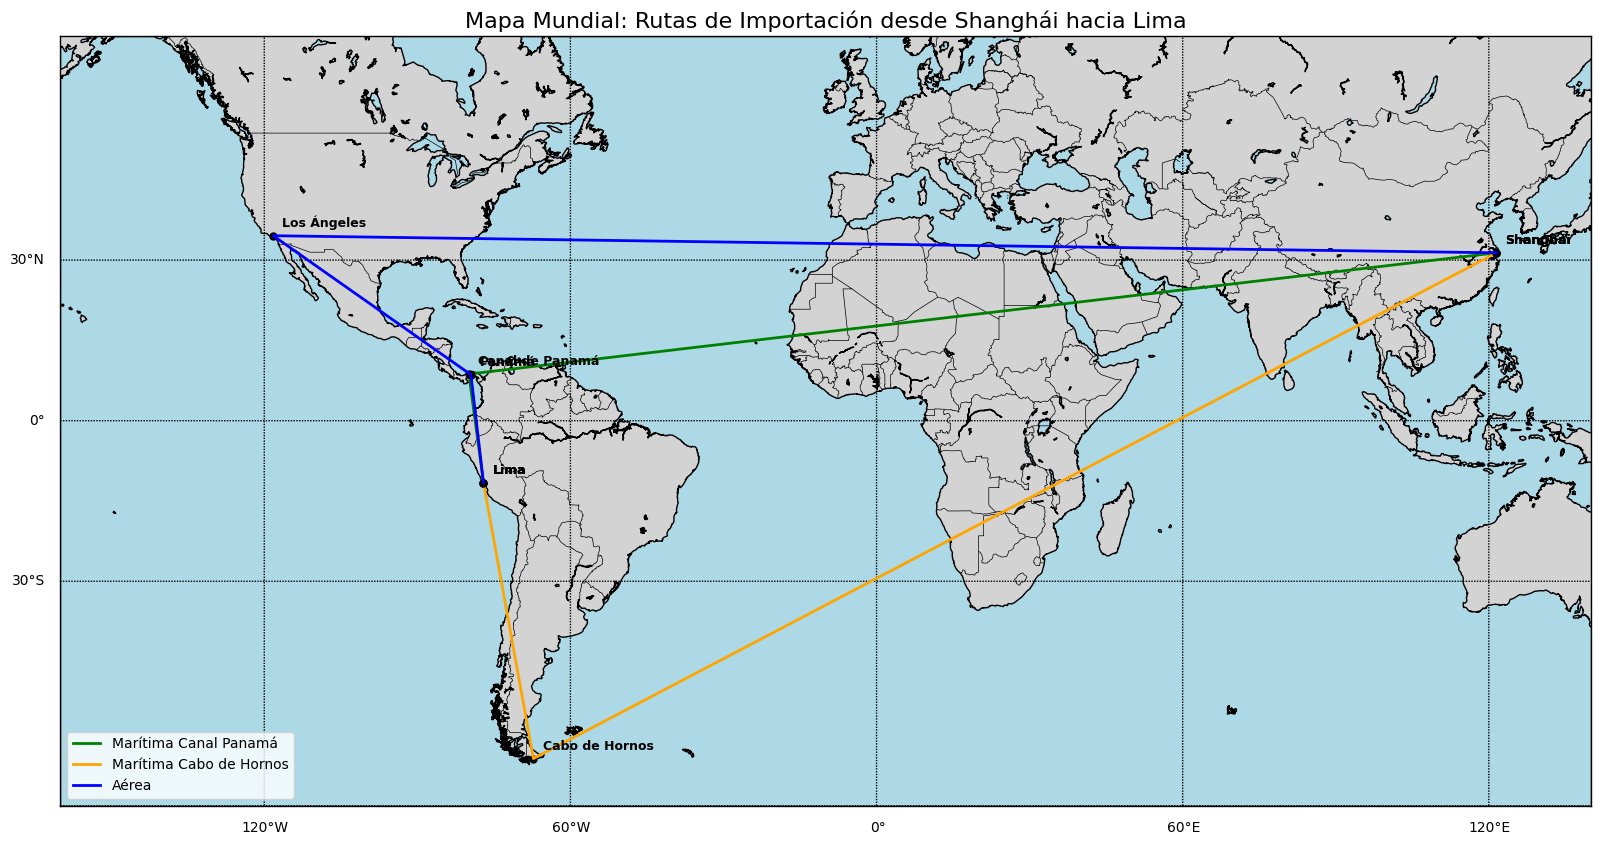

In [3]:
from mpl_toolkits.basemap import Basemap

# Coordenadas reales
coordenadas = {
    "Shanghái": (121.47, 31.23),
    "Canal de Panamá": (-79.9, 9.1),
    "Cabo de Hornos": (-67.25, -55.05),
    "Los Ángeles": (-118.25, 34.05),
    "Panamá": (-79.5, 8.98),
    "Lima": (-77.04, -12.05)
}

# Rutas
rutas = {
    "Marítima Canal Panamá": ["Shanghái", "Canal de Panamá", "Lima"],
    "Marítima Cabo de Hornos": ["Shanghái", "Cabo de Hornos", "Lima"],
    "Aérea": ["Shanghái", "Los Ángeles", "Panamá", "Lima"]
}

fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60,
            llcrnrlon=-160, urcrnrlon=140, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')
m.drawparallels(range(-60, 61, 30), labels=[1,0,0,0])
m.drawmeridians(range(-180, 181, 60), labels=[0,0,0,1])

# Dibujar rutas
colores = {"Marítima Canal Panamá": "green", "Marítima Cabo de Hornos": "orange", "Aérea": "blue"}
for nombre, puntos in rutas.items():
    x, y = [], []
    for p in puntos:
        lon, lat = coordenadas[p]
        xi, yi = m(lon, lat)
        x.append(xi)
        y.append(yi)
        m.plot(xi, yi, 'ko', markersize=5)
        plt.text(xi + 200000, yi + 200000, p, fontsize=9, weight='bold')
    m.plot(x, y, marker=None, color=colores[nombre], linewidth=2, label=nombre)

plt.title("Mapa Mundial: Rutas de Importación desde Shanghái hacia Lima", fontsize=16)
plt.legend()
plt.show()

## ✅ Conclusión

- **Ruta marítima vía Canal de Panamá** es la más rentable en costo/tiempo (USD $8,000 / 45 días).
- **Ruta marítima alternativa** es viable como respaldo pero costosa y lenta (USD $16,000 / 110 días).
- **Ruta aérea** es muy rápida (6 días) pero significativamente más cara (USD $45,000).